### IMPORTING THE PYTHON MODULES

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from time import time
import warnings
warnings.filterwarnings('ignore')

### READING THE DATA FILES

In [4]:
data= pd.read_csv('Consumer_Complaints_train.csv')
data_test= pd.read_csv('Consumer_Complaints_test_share.csv')

In [5]:
print('Train dataset: ',data.shape,'\n')
print('Test dataset:',data_test.shape)

Train dataset:  (478421, 18) 

Test dataset: (119606, 17)


In [8]:
data.columns  # COLUMN NAMES OF TRAINING DATASET

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [10]:
data_test.columns   # COLUMN NAMES OF TEST DATASET

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [12]:
data.head() #TOP 5 VALUES OF DATASET

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [14]:
data_test.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795


In [16]:
data.info() #CONCISE SUMMARY OF THE TRAINING DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478421 entries, 0 to 478420
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 478421 non-null  object
 1   Product                       478421 non-null  object
 2   Sub-product                   339948 non-null  object
 3   Issue                         478421 non-null  object
 4   Sub-issue                     185796 non-null  object
 5   Consumer complaint narrative  75094 non-null   object
 6   Company public response       90392 non-null   object
 7   Company                       478421 non-null  object
 8   State                         474582 non-null  object
 9   ZIP code                      474573 non-null  object
 10  Tags                          67206 non-null   object
 11  Consumer consent provided?    135487 non-null  object
 12  Submitted via                 478421 non-null  object
 13 

In [18]:
data_test.info()   # CONCISE SUMMARY OF THE TESTING DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84854 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46546 non-null   object
 5   Consumer complaint narrative  18557 non-null   object
 6   Company public response       22776 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118681 non-null  object
 9   ZIP code                      118680 non-null  object
 10  Tags                          16871 non-null   object
 11  Consumer consent provided?    33864 non-null   object
 12  Submitted via                 119605 non-null  object
 13 

In [20]:
data.rename(columns={'Consumer disputed?':'Target'},inplace=True) #CHANGING THE "Consumer disputed?" COLUMN NAME TO"Target"

In [22]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Target', 'Complaint ID'],
      dtype='object')

### LABEL ENCODING "Target" COLUMN VALUES

In [25]:
le= LabelEncoder() #INITIALIZE LABEL ENCODER
data['Target']= le.fit_transform(data['Target'])

In [27]:
#Pandas to_datetime() CONVERTS THE STRING DATE TIME INTO PYTHON DATE TIME OBJECT

data['Date received']=pd.to_datetime(data['Date received'],infer_datetime_format=True)
data['Date sent to company']=pd.to_datetime(data['Date sent to company'],infer_datetime_format=True)

#pd.to_numeric() FUNCTIONS TO CONVERT A COLUMN INTO A NUMERIC DATA TYPE
data['date_difference']=pd.to_numeric((data['Date sent to company']-data['Date received']).dt.days)

In [29]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Target', 'Complaint ID', 'date_difference'],
      dtype='object')

In [31]:
#SPLITTING THE TRAINING DATESET INTO X_train(INPTU FOR THE MODEL) AND y_train(OUTCOME/LABELS)
X_train= data.drop(['Date received','Sub-product','Sub-issue','Consumer complaint narrative','Company public response',
                    'Company','ZIP code','Date sent to company','Complaint ID','Target' ],axis=1)
y_train= data['Target']

In [33]:
X_train.columns

Index(['Product', 'Issue', 'State', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'date_difference'],
      dtype='object')

In [35]:
#OBTAIN A SERIES CONTAINTING COUNTS OF UNIQUE VALUES
y_train.value_counts()

Target
0    376990
1    101431
Name: count, dtype: int64

In [37]:
X_train.head()

,Product,Issue,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,date_difference
0,Credit card,Billing statement,MI,Older American,NaN,Web,Closed with explanation,Yes,1
1,Bank account or service,"Making/receiving payments, sending money",PA,NaN,NaN,Referral,Closed,Yes,6
2,Credit reporting,Incorrect information on credit report,CA,NaN,NaN,Referral,Closed with non-monetary relief,Yes,21
3,Credit card,Billing statement,GA,Older American,Consent provided,Web,Closed with monetary relief,Yes,0
4,Credit card,Transaction issue,MA,NaN,NaN,Web,Closed with explanation,Yes,8


In [39]:
X_train.isnull().sum() #RETURNIN THE NUMBER OF MISSING VALUES  

Product                              0
Issue                                0
State                             3839
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Company response to consumer         0
Timely response?                     0
date_difference                      0
dtype: int64

In [41]:
X_train.columns

Index(['Product', 'Issue', 'State', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'date_difference'],
      dtype='object')

In [43]:
# col_train REPRESENTS THE LIST OF COLUMN NAMES WHICH HAVE NULL VALUES

col_train= ['State', 'Tags','Consumer consent provided?']

for i in col_train:
    if X_train[i].isnull().sum()!= 0:
        X_train[i]=X_train[i].fillna(X_train[i].mode()[0])

In [45]:
X_train.isnull().sum()

Product                         0
Issue                           0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Company response to consumer    0
Timely response?                0
date_difference                 0
dtype: int64

### ONE-HOT ENCODING 

In [48]:
import pandas as pd

col_train = ['Product','Issue', 'State', 'Tags','Consumer consent provided?', 
             'Submitted via', 'Company response to consumer','Timely response?']

for i in col_train:
    if i in X_train.columns:
        dummy = pd.get_dummies(X_train[i], prefix=i).astype(int)
        dummy = dummy.iloc[:,:-1]
        X_train = pd.concat([X_train, dummy], axis=1)
        X_train = X_train.drop(columns=[i])

In [49]:
X_train.head()

,date_difference,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,21,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
X_train.shape

(478421, 184)

### DATA PRE-PROCESSING FOR TESTING DATASET 

In [55]:
data_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [57]:
data_test['Date received']=pd.to_datetime(data_test['Date received'],infer_datetime_format=True)
data_test['Date sent to company']=pd.to_datetime(data_test['Date sent to company'],infer_datetime_format=True)

data_test['date_difference']=pd.to_numeric((data_test['Date sent to company']-data_test['Date received']).dt.days)

In [59]:
data_test['date_difference']

0        -1
1         0
2         1
3         5
4         0
         ..
119601    6
119602    0
119603    3
119604    1
119605    0
Name: date_difference, Length: 119606, dtype: int64

In [61]:
data_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'date_difference'],
      dtype='object')

In [63]:
X_test= data_test.drop(['Date received','Sub-product','Sub-issue','Consumer complaint narrative',
                   'Company public response', 'Company','ZIP code','Date sent to company', 'Complaint ID'],axis=1)

In [65]:
X_test.columns

Index(['Product', 'Issue', 'State', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'date_difference'],
      dtype='object')

In [67]:
X_test.isnull().sum()

Product                              0
Issue                                0
State                              925
Tags                            102735
Consumer consent provided?       85742
Submitted via                        1
Company response to consumer         0
Timely response?                     0
date_difference                      0
dtype: int64

In [69]:
col_test= [ 'State', 'Tags','Consumer consent provided?', 
            'Submitted via']

for i in col_test:
    if X_test[i].isnull().sum()!= 0:
        X_test[i]=X_test[i].fillna(X_test[i].mode()[0])

In [71]:
X_test.isnull().sum()

Product                         0
Issue                           0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Company response to consumer    0
Timely response?                0
date_difference                 0
dtype: int64

In [73]:
import pandas as pd

col_test = ['Product', 'Issue', 'State', 'Tags', 'Consumer consent provided?', 
            'Submitted via', 'Company response to consumer', 'Timely response?']

for i in col_test:
    if i in X_test.columns:
        dummy = pd.get_dummies(X_test[i], prefix=i).astype(int)
        dummy = dummy.iloc[:,:-1]
        X_test = pd.concat([X_test, dummy], axis=1)
        X_test = X_test.drop(columns=[i])

In [75]:
X_test.head()

,date_difference,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No
0,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
X_test.shape

(119606, 183)

In [79]:
X_train.shape

(478421, 184)

### FEATURE COLUMS OF X_train(INPUT DATAFRAME FOR TRAIN THE MODEL) AND X_test(INPUT DATAFRAME FOR TEST THE MODEL) MUST BE SAME

In [82]:
import pandas as pd

# Assuming X_train and X_test are your DataFrames
common_column = X_train.columns.intersection(X_test.columns)

In [84]:
X_train= X_train[common_column]
X_test= X_test[common_column]

In [86]:
X_train.shape

(478421, 183)

In [88]:
X_test.shape

(119606, 183)

In [90]:
y_train.shape

(478421,)

### DATA PRE-PROCESSING FOR ACTUAL VALUE

In [93]:
# EXPORTING THE VALUES TO A .csv FILE

#true_value= pd.read_csv('Sample_Submission.csv')

# Assuming you have predictions stored in a variable called 'predictions'
predictions = np.random.randint(2, size=X_test.shape[0])  # Replace this with your actual predictions

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'Complaint ID': data_test['Complaint ID'],  # Assuming 'Complaint ID' is the unique identifier
    'Target': predictions
})

# Export to CSV
submission.to_csv('Sample_Submission.csv', index=False)


In [95]:
true_value = pd.read_csv('Sample_Submission.csv')
print(true_value.head())

   Complaint ID  Target
0        675956       1
1       1858795       1
2         32637       1
3       1731374       0
4        501487       0


In [97]:
true_value.head()

,Complaint ID,Target
0,675956,1
1,1858795,1
2,32637,1
3,1731374,0
4,501487,0


In [99]:
true_value.shape

(119606, 2)

In [101]:
# Correct code to get value counts for the 'Target' column
true_value['Target'].value_counts()

Target
0    59892
1    59714
Name: count, dtype: int64

In [103]:
true_value.rename(columns={'Consumer disputed?':'Target'},inplace=True)

In [105]:
le= LabelEncoder()
true_value['Target']= le.fit_transform(true_value['Target'])

In [107]:
y_true= true_value['Target']

In [109]:
y_true.value_counts()

Target
0    59892
1    59714
Name: count, dtype: int64

In [111]:
y_train.value_counts()

Target
0    376990
1    101431
Name: count, dtype: int64

### APPLYING THE LOGISTIC REGRESSION

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

# Align columns in X_test to match those in X_train
X_test = X_test[X_train.columns]

# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
start = time()
logreg.fit(X_train,y_train)
end = time()
# Print the results
print("Trained model in {:.4f} seconds".format(end - start))

# predict the response values for the observations in X_test
start = time()
y_predicted = logreg.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start))

# compute classification accuracy for the logistic regression model
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted)))



Trained model in 12.3640 seconds
Made predictions in 0.1668 seconds.
Train Accuracy 50.07%


In [116]:
from sklearn.metrics import confusion_matrix,classification_report

print("Classification Report")
print (classification_report(y_true,y_predicted))

print ("Confusion matrix")
print (confusion_matrix(y_true,y_predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     59892
           1       0.00      0.00      0.00     59714

    accuracy                           0.50    119606
   macro avg       0.25      0.50      0.33    119606
weighted avg       0.25      0.50      0.33    119606

Confusion matrix
[[59892     0]
 [59714     0]]


In [118]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.29257563, 0.19762137, 0.33452934, ..., 0.2131433 , 0.20026144,
       0.23369933])

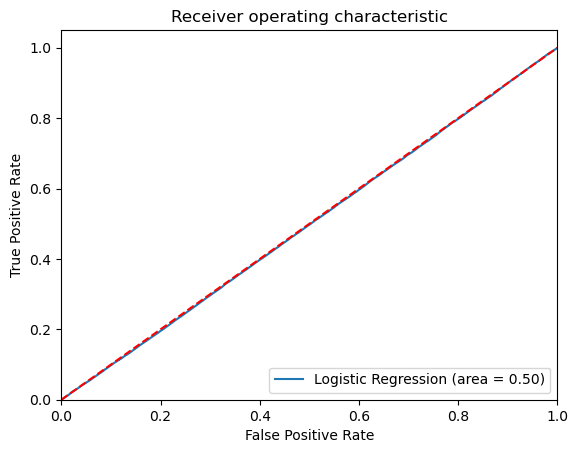

KS Score: 0.0012466506429595903


In [120]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_true,  y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_true, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# Compute KS score (Kolmogorov-Smirnov Statistic)
ks = max(tpr - fpr)
print("KS Score:", ks)


In [122]:
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
# Compute KS score (Kolmogorov-Smirnov Statistic)
ks = max(tpr - fpr)
print("KS Score:", ks)


KS Score: 0.0012466506429595903


### APPLYING XGBOOST

In [125]:
from xgboost.sklearn import XGBClassifier

xgb=XGBClassifier()
start=time()
xgb.fit(X_train,y_train)
end=time()
print("Trained model in {:.4f} seconds".format(end - start),'\n')

# predict the response values for the observations in X_test
start = time()
y_predicted_xgb = xgb.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')

#displaying accuracy score of the XGBOOST model
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_xgb)),'\n')

#calculating probability of predicted values
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

#Compute Receiver operating characteristic (ROC)
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_xgb)

#compute AUC ROC score
roc_auc_xgb = metrics.auc(fpr, tpr)

print ('Classification Report: \n',classification_report(y_true,y_predicted_xgb),'\n')

print ('Confusion Matrix: \n',confusion_matrix(y_true,y_predicted_xgb),'\n')

print('ROC_AUC score: ',roc_auc_xgb)
# Compute KS score (Kolmogorov-Smirnov Statistic)
ks = max(tpr - fpr)
print("KS Score:", ks)


Trained model in 7.8129 seconds 

Made predictions in 0.2951 seconds. 

Train Accuracy 50.07% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     59892
           1       0.47      0.00      0.00     59714

    accuracy                           0.50    119606
   macro avg       0.49      0.50      0.33    119606
weighted avg       0.49      0.50      0.34    119606
 

Confusion Matrix: 
 [[59826    66]
 [59655    59]] 

ROC_AUC score:  0.49770199168452867
KS Score: 0.00014626533183360445


### DECISION TREE

In [128]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(max_features = 'sqrt')
start=time()
dtree.fit(X_train,y_train)
end=time()
print("Trained model in {:.4f} seconds".format(end - start),'\n')

# predict the response values for the observations in X_test
start = time()
y_predicted_dt = dtree.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')


from sklearn.metrics import accuracy_score
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_dt)),'\n')

y_pred_prob_dt = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_dt)
roc_auc_dt = metrics.auc(fpr, tpr)

print ('Classification Report: \n',classification_report(y_true,y_predicted_dt),'\n')

print ('Confusion Matrix: \n',confusion_matrix(y_true,y_predicted_dt),'\n')

print('ROC_AUC score: ',roc_auc_dt)
# Compute KS score (Kolmogorov-Smirnov Statistic)
ks = max(tpr - fpr)
print("KS Score:", ks)


Trained model in 3.0682 seconds 

Made predictions in 0.2128 seconds. 

Train Accuracy 50.05% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.94      0.65     59892
           1       0.50      0.06      0.10     59714

    accuracy                           0.50    119606
   macro avg       0.50      0.50      0.38    119606
weighted avg       0.50      0.50      0.38    119606
 

Confusion Matrix: 
 [[56383  3509]
 [56232  3482]] 

ROC_AUC score:  0.4982410984433756
KS Score: 0.0


### APPLYING SMOTE (Synthetic Minority Oversampling Technique)

In [133]:
from imblearn.over_sampling import SMOTE
import numpy as np
from time import time

smt = SMOTE(random_state=121, sampling_strategy='auto')

start = time()
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
end = time()

print("Model oversampling using SMOTE needs {:.4f} seconds".format(end - start), '\n')
print("Shape of y before ", np.bincount(y_train), '\n')
print("Shape of y after applying SMOTE ", np.bincount(y_train_smote))

Model oversampling using SMOTE needs 223.8194 seconds 

Shape of y before  [376990 101431] 

Shape of y after applying SMOTE  [376990 376990]


In [135]:
X_train_smote= pd.DataFrame(X_train_smote,columns=X_train.columns)

In [137]:
X_test= X_test.reindex(X_train_smote.columns,axis=1)

### LOGISTIC REGRESSION AFTER APPLYING SMOTE 

In [140]:
logreg = LogisticRegression()
start=time()
logreg.fit(X_train_smote,y_train_smote)
end=time()
print("Trained model in {:.4f} seconds".format(end - start))

Trained model in 18.2891 seconds


In [142]:
start = time()
y_predicted_lr = logreg.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')

print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_lr)))

Made predictions in 0.1633 seconds. 

Train Accuracy 49.90%


In [144]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report \n")
print (classification_report(y_true,y_predicted_lr))
print ("Confusion matrix \n")
print (confusion_matrix(y_true,y_predicted_lr))

Classification Report 

              precision    recall  f1-score   support

           0       0.50      0.61      0.55     59892
           1       0.50      0.39      0.44     59714

    accuracy                           0.50    119606
   macro avg       0.50      0.50      0.49    119606
weighted avg       0.50      0.50      0.49    119606

Confusion matrix 

[[36409 23483]
 [36443 23271]]


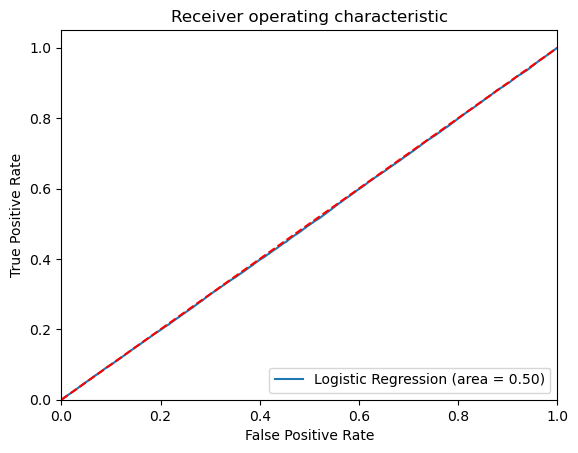

KS Score: 0.0009781341328594095


In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob_lr = logreg.predict_proba(X_test)[:, 1]
logit_roc_auc = roc_auc_score(y_true, y_pred_prob_lr)
fpr, tpr, thresholds = roc_curve(y_true, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
# Compute KS score (Kolmogorov-Smirnov Statistic)
ks = max(tpr - fpr)
print("KS Score:", ks)


In [148]:
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_lr)
roc_auc_lr = metrics.auc(fpr, tpr)
print("ROC_AUC score: {:.2}".format(roc_auc_lr))
# Compute KS score (Kolmogorov-Smirnov Statistic)
ks = max(tpr - fpr)
print("KS Score:", ks)


ROC_AUC score: 0.5
KS Score: 0.0009781341328594095


### APPLYING XGBOOST AFTER APPLYING SMOTE

In [151]:
from xgboost.sklearn import XGBClassifier

xgb=XGBClassifier()
start=time()
xgb.fit(X_train_smote,y_train_smote)
end=time()
print("Trained model in {:.4f} seconds".format(end - start),'\n')

# predict the response values for the observations in X_test
start = time()
y_predicted_xgboost = xgb.predict(X_test)
end = time()
print("Made predictions in {:.4f} seconds.".format(end - start),'\n')

#displaying accuracy score of the XGBOOST model
print("Train Accuracy {:.2%}".format(accuracy_score(y_true,y_predicted_xgboost)),'\n')

#calculating probability of predicted values
y_pred_prob_xgboost = xgb.predict_proba(X_test)[:, 1]

#Compute Receiver operating characteristic (ROC)
fpr, tpr, threshold = metrics.roc_curve(y_true,y_pred_prob_xgboost)

#compute AUC ROC score
roc_auc_xgboost = metrics.auc(fpr, tpr)

print ('Classification Report: \n',classification_report(y_true,y_predicted_xgboost),'\n')

print ('Confusion Matrix: \n',confusion_matrix(y_true,y_predicted_xgboost),'\n')

print('ROC_AUC score: ',roc_auc_xgboost)
# Compute KS score (Kolmogorov-Smirnov Statistic)
ks = max(tpr - fpr)
print("KS Score:", ks)


Trained model in 9.7121 seconds 

Made predictions in 0.2866 seconds. 

Train Accuracy 49.86% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     59892
           1       0.50      0.45      0.47     59714

    accuracy                           0.50    119606
   macro avg       0.50      0.50      0.50    119606
weighted avg       0.50      0.50      0.50    119606
 

Confusion Matrix: 
 [[32560 27332]
 [32636 27078]] 

ROC_AUC score:  0.4983706019049672
KS Score: 0.0015581277814730732


In [160]:
from sklearn.feature_selection import RFE

# Using Recursive Feature Elimination (RFE) to select the best features
logreg = LogisticRegression()
selector = RFE(logreg, n_features_to_select=10, step=1)  # Selecting top 10 features
selector = selector.fit(X_train, y_train)

# Transform data with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit logistic regression on selected features
logreg.fit(X_train_selected, y_train)
y_pred_prob_selected = logreg.predict_proba(X_test_selected)[:, 1]

# Compute new AUC and KS score
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_prob_selected)
roc_auc_selected = metrics.auc(fpr, tpr)
ks_selected = max(tpr - fpr)

print("ROC AUC after feature selection:", roc_auc_selected)
print("KS Score after feature selection:", ks_selected)

ROC AUC after feature selection: 0.4978233966186081
KS Score after feature selection: 0.0017327496333784387


In [161]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

# Best model
best_logreg = grid.best_estimator_
y_pred_prob_tuned = best_logreg.predict_proba(X_test)[:, 1]

# Compute new AUC and KS score
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_prob_tuned)
roc_auc_tuned = metrics.auc(fpr, tpr)
ks_tuned = max(tpr - fpr)

print("Best Logistic Regression Model:", grid.best_params_)
print("ROC AUC after tuning:", roc_auc_tuned)
print("KS Score after tuning:", ks_tuned)

Best Logistic Regression Model: {'C': 0.1}
ROC AUC after tuning: 0.49741379891358223
KS Score after tuning: 0.0013846540143629404
